In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
cancer['feature_names']
print(len(cancer['feature_names']))

30


In [ ]:
data = pd.DataFrame(data=cancer['data'],columns=cancer['feature_names'])
data['target'] = cancer['target']

In [ ]:
data.shape

(569, 31)

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
malignant = (data['target'] == 0).sum()
benign = (data['target']==1).sum()
ans = [malignant,benign]

In [ ]:
ans

[212, 357]

In [ ]:
X = data.drop(labels=['target'],axis=1)
y = data['target']
print(X.shape,y.shape)

(569, 30) (569,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
means = data.mean()[:-1].values.reshape(1, -1)

In [ ]:
knn.predict(means)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
knn.score(X_test,y_test)

0.916083916083916

Text(0.5, 1.0, 'Training and Test Accuracies for Malignant and Benign Cells')

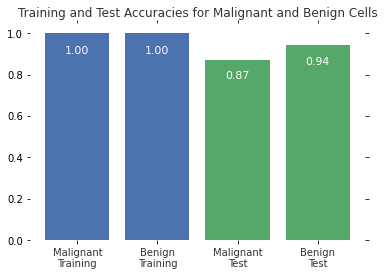

In [ ]:

import matplotlib.pyplot as plt
# Find the training and testing accuracies by target value (i.e. malignant, benign)
mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]

mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]
scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y),
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]
plt.figure()

# Plot the scores as a bar chart
bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

# directly label the score onto the bars
for bar in bars:
  height = bar.get_height()
  plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
for spine in plt.gca().spines.values():
  spine.set_visible(False)

plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)


#Making Datasets

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
X_r1,y_r1 = make_regression(n_samples=100,n_features=1,n_informative=1,bias=150.0,noise=30,random_state=0)

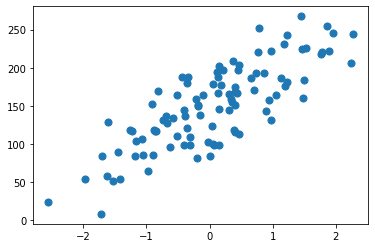

In [ ]:
plt.scatter(X_r1,y_r1,marker='o',s=50)

In [ ]:
X_r1.shape,y_r1.shape

((100, 1), (100,))

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X_c2,y_c2 = make_classification(n_samples=100,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,flip_y=0.1,class_sep=0.5,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_r1,y_r1,random_state=0)

In [ ]:
knnreg = KNeighborsRegressor(n_neighbors=1)
knnreg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
knnreg.predict(X_test)

array([221.6995233 , 145.006712  , 168.56121251, 168.56121251,
       128.51720234,  98.34605458, 150.68774757, 224.52395686,
       231.40263398,  83.82329023, 193.30736176, 127.36240448,
       224.52395686, 145.006712  , 196.359452  , 118.15657878,
       145.006712  , 251.48432189, 117.76643281, 177.05657699,
       244.83225266, 181.29217391, 117.24433728, 136.60775075,
       159.31600712])

In [ ]:
knnreg.score(X_test,y_test)

0.15503287768493956